## <u>Plots & Graphs for visualising the results</u>

In [26]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd

## Heatmap

In [27]:
def create_hm(df, title=None, vmin=0, vmax=100, cbar=True):
    # Create the heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f', vmin=vmin, vmax=vmax, cbar=cbar, square=True)

    # Add labels and title
    if title:
        plt.title(title)
    plt.xlabel('Foundation Model')
    plt.ylabel('Animal dataset')
    plt.tight_layout()
    return plt

def create_hm2(df, title=None, vmin=0, vmax=100, cbar=True):
    # Set up figure and gridspec to keep heatmap size fixed
    fig = plt.figure(figsize=(9, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[30, 1])  # Allocate space for heatmap and color bar
    
    # Create heatmap in the first subplot
    ax0 = plt.subplot(gs[0])
    sns.heatmap(df, annot=True, cmap='Blues', fmt='.2f', vmin=vmin, vmax=vmax, 
                cbar=False, square=True, ax=ax0)

    # Add labels and title
    if title:
        ax0.set_title(title)
    ax0.set_xlabel('Foundation Model')
    ax0.set_ylabel('Animal dataset')

    # Add color bar only if specified
    if cbar:
        ax1 = plt.subplot(gs[1])  # Separate subplot for color bar
        cbar = fig.colorbar(ax0.collections[0], cax=ax1)
        cbar.set_label('Accuracy (%)')

    plt.tight_layout()  # Ensure everything fits well
    return plt    

def create_two_hm(df1, df2, title1=None, title2=None, vmin=0, vmax=100, cbar=True):
    # Set up figure and gridspec to keep heatmaps side by side with shared color bar
    fig = plt.figure(figsize=(9, 6))  # Width increased to accommodate two heatmaps
    gs = gridspec.GridSpec(1, 3, width_ratios=[30, 30, 1])  # Allocate space for two heatmaps and color bar
    
    # Transpose the dataframes to swap axes
    df1 = df1.T
    df2 = df2.T
    
    # Create the first heatmap (with left axis labels)
    ax0 = plt.subplot(gs[0])
    sns.heatmap(df1, annot=True, cmap='Blues', fmt='.2f', vmin=vmin, vmax=vmax, 
                cbar=False, square=True, ax=ax0)

    # Add title to the first heatmap, if provided
    if title1:
        ax0.set_title(title1)
    ax0.set_xlabel('Animal dataset')  # Now datasets are at the bottom
    ax0.set_ylabel('Foundation Model')  # Now foundation models are on the side

    # Create the second heatmap (no left axis labels)
    ax1 = plt.subplot(gs[1])
    sns.heatmap(df2, annot=True, cmap='Blues', fmt='.2f', vmin=vmin, vmax=vmax, 
                cbar=False, square=True, ax=ax1)

    # Add title to the second heatmap, if provided
    if title2:
        ax1.set_title(title2)
    ax1.set_xlabel('Animal dataset')  # Now datasets are at the bottom
    
    # Remove the y-axis label and ticks for the second heatmap to avoid redundancy
    ax1.set_ylabel('')
    ax1.set_yticks([])

    # Add a shared color bar on the right side
    if cbar:
        ax2 = plt.subplot(gs[2])  # Separate subplot for the color bar
        cbar = fig.colorbar(ax0.collections[0], cax=ax2, shrink=1)  # Shared color bar
        cbar.set_label('Accuracy (%) / Area (x10)')

    plt.tight_layout()  # Ensure everything fits well
    return plt


### Linear probing

<module 'matplotlib.pyplot' from '/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

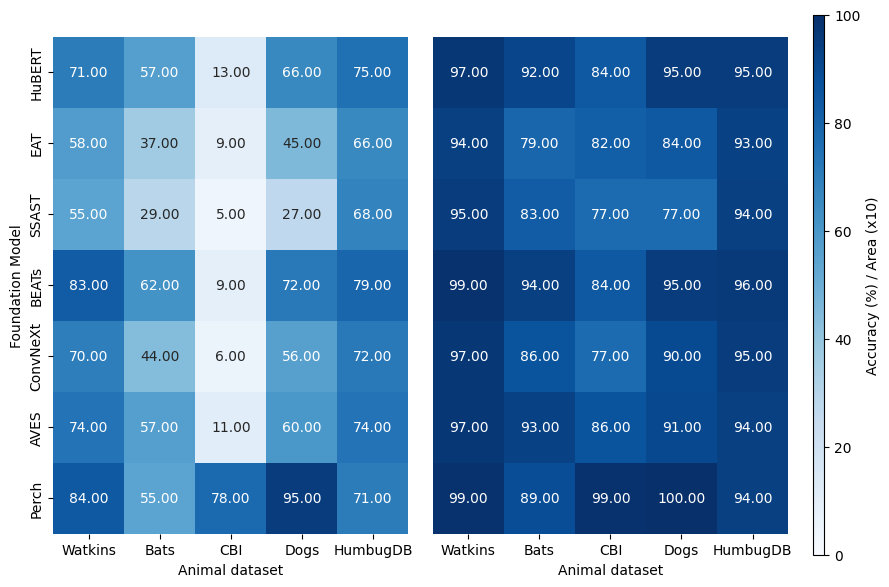

In [28]:
df_probet1 = pd.read_csv('probing_t1.csv', index_col='Dataset/Model')
df_probeauc = pd.read_csv('probing_auc.csv', index_col='Dataset/Model')
plt = create_two_hm(df_probet1, df_probeauc)

plt.savefig('probing_hm.png', dpi=300, bbox_inches='tight')

plt

##### Row statistics

In [29]:
row = df_probet1.iloc[0]

mean_value = row.mean()

# Calculate the variance
variance_value = row.var()

print(f"Mean: {mean_value}")
print(f"Variance: {variance_value}")
print(row.std())

Mean: 70.71428571428571
Variance: 124.5714285714286
11.161157134071207


##### Column statistics

In [32]:
column = df_probet1.iloc[:, 0]  # This selects the first column

# Calculate the standard deviation
std_dev = column.std()
mean_value = column.mean()
print(f"Mean: {mean_value}")

print(f"Standard Deviation: {std_dev}")

Mean: 56.4
Standard Deviation: 25.175384803414623


In [33]:
df_probet1

,HuBERT,EAT,SSAST,BEATs,ConvNeXt,AVES,Perch
Dataset/Model,,,,,,,
Watkins,71,58,55,83,70,74,84
Bats,57,37,29,62,44,57,55
CBI,13,9,5,9,6,11,78
Dogs,66,45,27,72,56,60,95
HumbugDB,75,66,68,79,72,74,71


### Finetuning

<module 'matplotlib.pyplot' from '/home/vscode/.cache/pypoetry/virtualenvs/birdset-xS3fZVNL-py3.10/lib/python3.10/site-packages/matplotlib/pyplot.py'>

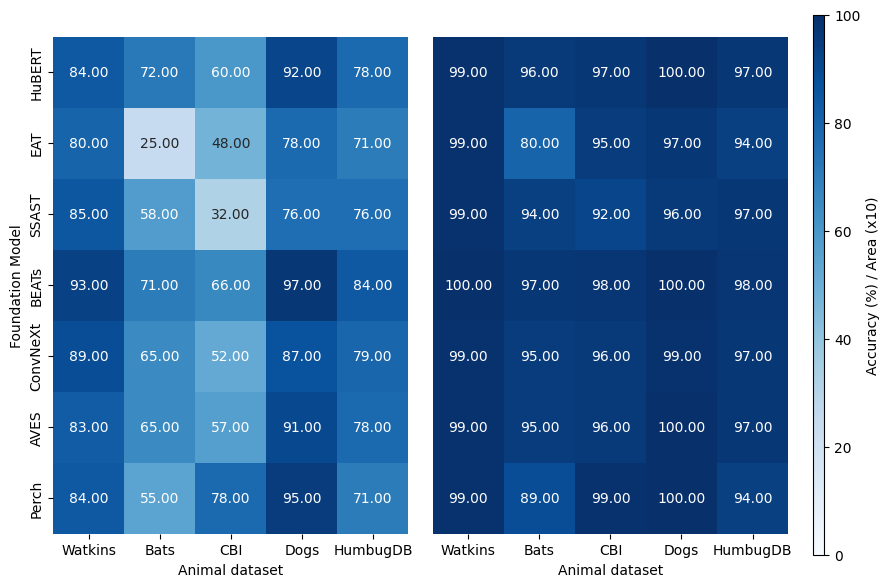

In [126]:
df_finet1 = pd.read_csv('finetuning_t1.csv', index_col='Dataset/Model')
df_fineauc = pd.read_csv('finetuning_auc.csv', index_col='Dataset/Model')
plt = create_two_hm(df_finet1, df_fineauc)

plt.savefig('finetuning_hm.png', dpi=300, bbox_inches='tight')

plt

In [66]:
# Read the finetuning and probing CSV files
df_finetuning = pd.read_csv('finetuning.csv', index_col='Dataset/Model')
df_probing = pd.read_csv('probing.csv', index_col='Dataset/Model')

# Calculate the difference between the two DataFrames
df_difference = df_finetuning - df_probing

# Calculate the mean of the difference
mean_difference = df_difference.mean()

mean_difference

FileNotFoundError: [Errno 2] No such file or directory: 'finetuning.csv'

## Other plots

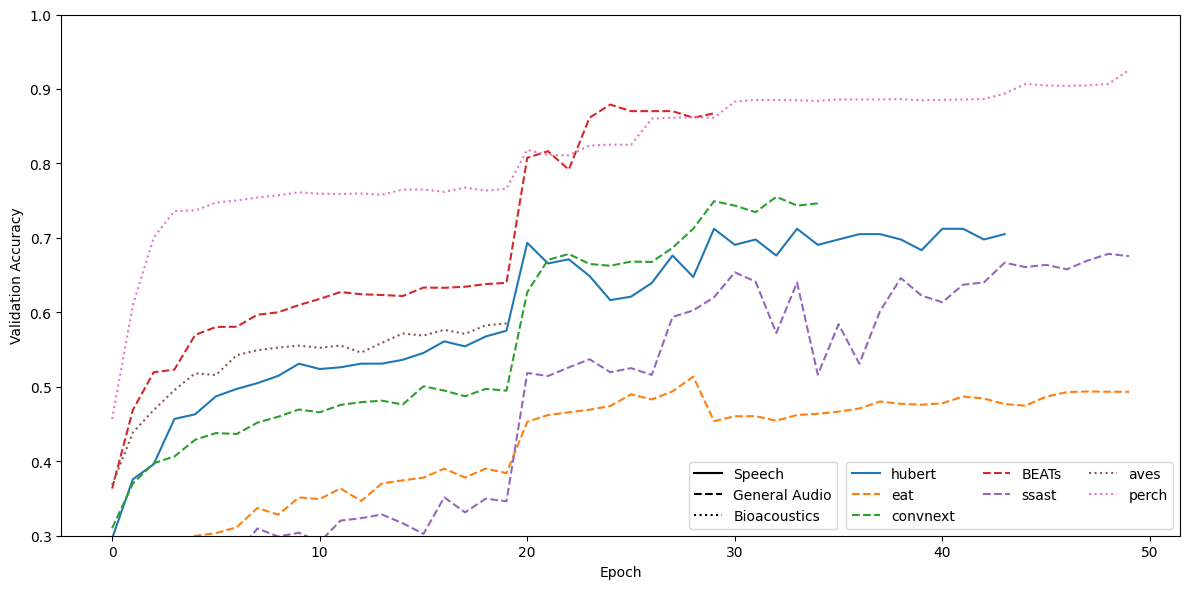

In [117]:
# Load your CSV file
file_path = 'probing_epoch.csv'  # Replace with your file path
data = pd.read_csv(file_path)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Identify the columns related to accuracy (excluding min and max), and epoch
accuracy_columns = [col for col in data.columns if 'val/MulticlassAccuracy' in col and 'MIN' not in col and 'MAX' not in col]

# Extract the 'epoch' column and the accuracy columns
clean_data = data[['epoch'] + accuracy_columns]

# Simplify the column names by removing common parts including 'val/MulticlassAccuracy'
clean_data.columns = ['epoch'] + [col.replace('datamodule.embedding_model.model_name: ', '').replace(' (Linear Probing)', '').replace(' - val/MulticlassAccuracy', '') for col in accuracy_columns]

# Define line styles for each domain
line_styles = {
    'hubert': '-',  # Speech
    'eat': '--', 'ssast': '--', 'beats': '--', 'convnext': '--',  # General audio
    'aves': ':', 'perch': ':'  # Bioacoustics
}

# Plot accuracy vs epoch for all models
fig = plt.figure(figsize=(12, 6))

# Plot each model's accuracy as a separate line, applying the appropriate line style
lines = []
labels = []
for column in clean_data.columns[1:]:  # Skip 'epoch' column
    # Use the model name to determine the line style
    model_name = column.split()[0].lower()  # Get the first word of the model name (e.g., "hubert", "eat")
    line_style = line_styles.get(model_name, '-.')  # Default to solid line if model not in the dictionary
    line, = plt.plot(clean_data['epoch'], clean_data[column], label=column, linestyle=line_style)
    lines.append(line)
    labels.append(column)

# Adding labels, title, and legend for models (color-based legend)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
#plt.title('Accuracy vs Epoch for All Models')

# Set a reasonable y-axis range to improve readability
plt.ylim(0.3, 1.0)

# Move the model-specific legend (for colors only)
model_legend = plt.legend(handles=lines, labels=labels, loc='lower right', ncol=3)

# Create a custom legend for line styles (Speech, General Audio, Bioacoustics)
speech_line = mlines.Line2D([], [], color='black', linestyle='-', label='Speech')
general_audio_line = mlines.Line2D([], [], color='black', linestyle='--', label='General Audio')
bioacoustics_line = mlines.Line2D([], [], color='black', linestyle=':', label='Bioacoustics')

# Display custom line style legend next to the model-specific legend (bottom-right)
style_legend = plt.legend(handles=[speech_line, general_audio_line, bioacoustics_line], loc='lower right', bbox_to_anchor=(0.7, 0))

# Re-add the model legend to ensure both legends show
plt.gca().add_artist(model_legend)

# Adjust layout to prevent clipping of the legends
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('probing_epoch.png', dpi=300, bbox_inches='tight')

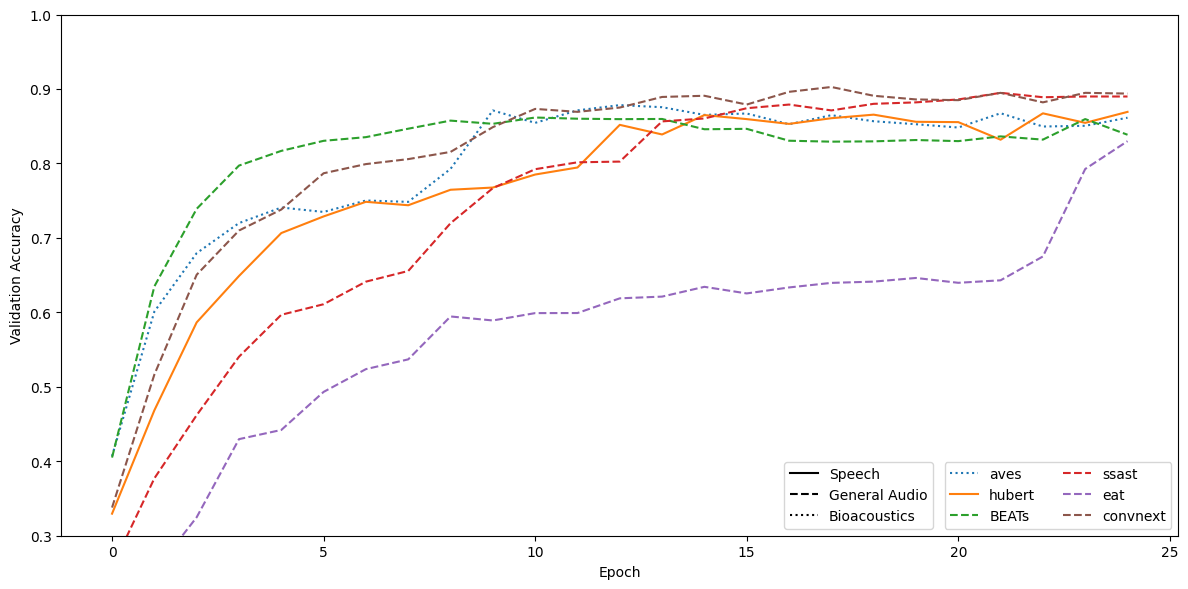

In [116]:
# Load your CSV file
file_path = 'finetuning_epoch.csv'  # Replace with your file path
data = pd.read_csv(file_path)

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Identify the columns related to accuracy (excluding min and max), and epoch
accuracy_columns = [col for col in data.columns if 'val/MulticlassAccuracy' in col and 'MIN' not in col and 'MAX' not in col]

# Extract the 'epoch' column and the accuracy columns
clean_data = data[['epoch'] + accuracy_columns]

# Simplify the column names by removing common parts including 'val/MulticlassAccuracy'
clean_data.columns = ['epoch'] + [col.replace('module.embedding_model.model_name: ', '').replace(' (Finetuning)', '').replace(' - val/MulticlassAccuracy', '') for col in accuracy_columns]

# Define line styles for each domain
line_styles = {
    'hubert': '-',  # Speech
    'eat': '--', 'ssast': '--', 'beats': '--', 'convnext': '--',  # General audio
    'aves': ':', 'perch': ':'  # Bioacoustics
}

# Plot accuracy vs epoch for all models
fig = plt.figure(figsize=(12, 6))

# Plot each model's accuracy as a separate line, applying the appropriate line style
lines = []
labels = []
for column in clean_data.columns[1:]:  # Skip 'epoch' column
    # Use the model name to determine the line style
    model_name = column.split()[0].lower()  # Get the first word of the model name (e.g., "hubert", "eat")
    line_style = line_styles.get(model_name, '-.')  # Default to solid line if model not in the dictionary
    line, = plt.plot(clean_data['epoch'], clean_data[column], label=column, linestyle=line_style)
    lines.append(line)
    labels.append(column)

# Adding labels, title, and legend for models (color-based legend)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
#plt.title('Accuracy vs Epoch for All Models')

# Set a reasonable y-axis range to improve readability
plt.ylim(0.3, 1.0)

# Move the model-specific legend (for colors only)
model_legend = plt.legend(handles=lines, labels=labels, loc='lower right', ncol=2)

# Create a custom legend for line styles (Speech, General Audio, Bioacoustics)
speech_line = mlines.Line2D([], [], color='black', linestyle='-', label='Speech')
general_audio_line = mlines.Line2D([], [], color='black', linestyle='--', label='General Audio')
bioacoustics_line = mlines.Line2D([], [], color='black', linestyle=':', label='Bioacoustics')

# Display custom line style legend next to the model-specific legend (bottom-right)
style_legend = plt.legend(handles=[speech_line, general_audio_line, bioacoustics_line], loc='lower right', bbox_to_anchor=(0.7865, 0))

# Re-add the model legend to ensure both legends show
plt.gca().add_artist(model_legend)

# Adjust layout to prevent clipping of the legends
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig('finetuning_epoch.png', dpi=300, bbox_inches='tight')